In [1]:
from buildstock_query import BuildStockQuery
import pandas as pd
import os
os.environ['AWS_PROFILE'] = "nrel-aws-resbldg"
os.environ['AWS_DEFAULT_REGION'] = "us-west-2"
## annual table - from SQL
## timeseries tables - from timeseries (8760)

c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pydantic\_internal\_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'smart_union' has been removed
  warnings.warn(message, UserWarning)


# Query:

In [2]:
my_run = BuildStockQuery(db_name='gashpwh',
                        table_name='icf',
                        workgroup='gashpwh',
                        buildstock_type='resstock')

INFO:buildstock_query.query_core:Loading icf ...
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials
INFO:buildstock_query.query_core:3 queries cache read from icf_query_cache.pkl.
INFO:buildstock_query.query_core:3 queries cache is updated.
INFO:buildstock_query.main:Getting Success counts...
INFO:buildstock_query.report_query:Checking integrity with ts_tables ...
INFO:buildstock_query.query_core:3 queries cache saved to icf_query_cache.pkl


        Fail  Invalid Success    Sum
upgrade                             
0         42        0   15955  15997
Annual and timeseries tables are verified to have the same number of buildings.
All buildings are verified to have the same number of (8760) timeseries rows.


# Dataframe from Query:

In [3]:
res_df = my_run.get_results_csv()
res_df.columns
res_df.shape

INFO:buildstock_query.main:Making results_csv query ...
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pyathena\pandas\result_set.py:273: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(
c:\Users\pshrest2\Anaconda3\envs\buildstock_query\lib\site-packages\pyathena\pandas\result_set.py:273: DtypeWarning: Columns (10,183,184,185,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,481,482,505,521) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(


(15997, 545)

# Basic filtering example:
df = res_df.filter(regex='report_simulation_output.emissions')

# Dataframe for emissions:

In [4]:
# # Creating a list of columns to keep in the res_df dataframe:
# regex_patterns = ['report_simulation_output.emissions',
# 'build_existing_model.cec_climate_zone',
# 'build_existing_model.geometry_stories',
# 'build_existing_model.heating_fuel',
# 'build_existing_model.hot_water_distribution',
# 'build_existing_model.hot_water_fixtures',
# 'build_existing_model.hvac_heating_type_and_fuel',
# 'build_existing_model.income_recs_2020',
# 'build_existing_model.occupants',
# 'build_existing_model.sample_weight',
# 'build_existing_model.vacancy_status',
# 'build_existing_model.vintage',
# 'build_existing_model.water_heater_efficiency',
# 'build_existing_model.water_heater_fuel',
# 'build_existing_model.water_heater_in_unit',
# 'report_simulation_output.fuel_use',
# 'report_simulation_output.load_hot_water_tank_losses_m_btu',
# 'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_wood_pellets_total_lb',
# 'report_simulation_output.fuel_use_electricity_total_m_btu',
# 'report_simulation_output.fuel_use_fuel_oil_total_m_btu',
# 'report_simulation_output.fuel_use_natural_gas_total_m_btu',
# 'report_simulation_output.fuel_use_natural_gas_total_m_btu',
# 'report_simulation_output.fuel_use_propane_total_m_btu',
# 'report_simulation_output.fuel_use_wood_cord_total_m_btu',
# 'report_simulation_output.fuel_use_wood_pellets_total_m_btu'

# ]

# Creating a list of columns to keep in the res_df dataframe:
regex_patterns = [
    
    # 'report_simulation_output.emissions',
'build_existing_model.cec_climate_zone',
'build_existing_model.geometry_stories',
'build_existing_model.sample_weight',
'build_existing_model.occupants',
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb',

# Totals by fuel type:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb', # For Fuel Type Electricity Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb', # For Fuel Type Natural Gas Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb', # For Fuel Type Propane Total

# Heating, electricity:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_lb', # For Heating by fuel type electricity

# Water Heating, electricity:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_recirc_pump_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_solar_thermal_pump_lb', # For water heating by fuel type electricity

# Heating, natural gas:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_heat_pump_backup_lb', # For Heating by fuel type natural gas
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_lb', # For Heating by fuel type natural gas

# Water Heating, natural gas:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_hot_water_lb', # For water heating by fuel type natural gas

# Heating, propane:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_heat_pump_backup_lb', # For heating by fuel type Propane
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_lb', # For heating by fuel type Propane

# Water Heating, propane:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_hot_water_lb' # For water heating by fuel type propane

]

filtered_dfs = [res_df.filter(regex=pattern) for pattern in regex_patterns]
df = pd.concat(filtered_dfs, axis=1)
df = df[df['build_existing_model.geometry_stories'].astype(float) <= 5.0]  # Limiting to <= 5 stories high
# Convert the column to numeric (integer)
df['build_existing_model.cec_climate_zone'] = df['build_existing_model.cec_climate_zone'].astype(int)

print(df['build_existing_model.geometry_stories'])
df.shape

building_id
51        2
76        3
130       2
224       2
271       2
         ..
549843    3
549856    1
549858    3
549867    1
549895    2
Name: build_existing_model.geometry_stories, Length: 14173, dtype: object


(14173, 22)

In [5]:
# Outputting the full emissions dataset for easy viewing:
df.to_csv('emissions/df.csv', index=False)
res_df.to_csv('emissions/res_df.csv', index=False)

In [6]:
# Total CO2e number across all homes:
totalCO2e = "{:e}".format(df['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].sum())
print("total CO2e, lb = ", totalCO2e)

# Converting to metric tons:
# 1 pound = 0.00045359237 metric tons
print("total MtCO2e = ", (df['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].sum())*0.00045359237)

total CO2e, lb =  6.150304e+07
total MtCO2e =  27897.309122422106


# Sanity check plot

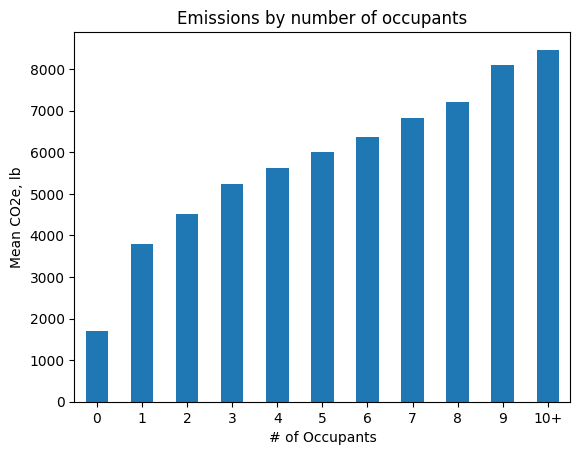

In [7]:
import matplotlib.pyplot as plt

grouped = df.groupby('build_existing_model.occupants')['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].mean()

# Sort the data based on the mean values in ascending order
grouped_sorted = grouped.sort_values()

# Generate bar graph for each group
ax = grouped_sorted.plot(kind='bar')
plt.ylabel('Mean CO2e, lb')
plt.xlabel('# of Occupants')
plt.title('Emissions by number of occupants')
ax.set_xticklabels(grouped_sorted.index, rotation=0)
plt.show()

# Actual plots

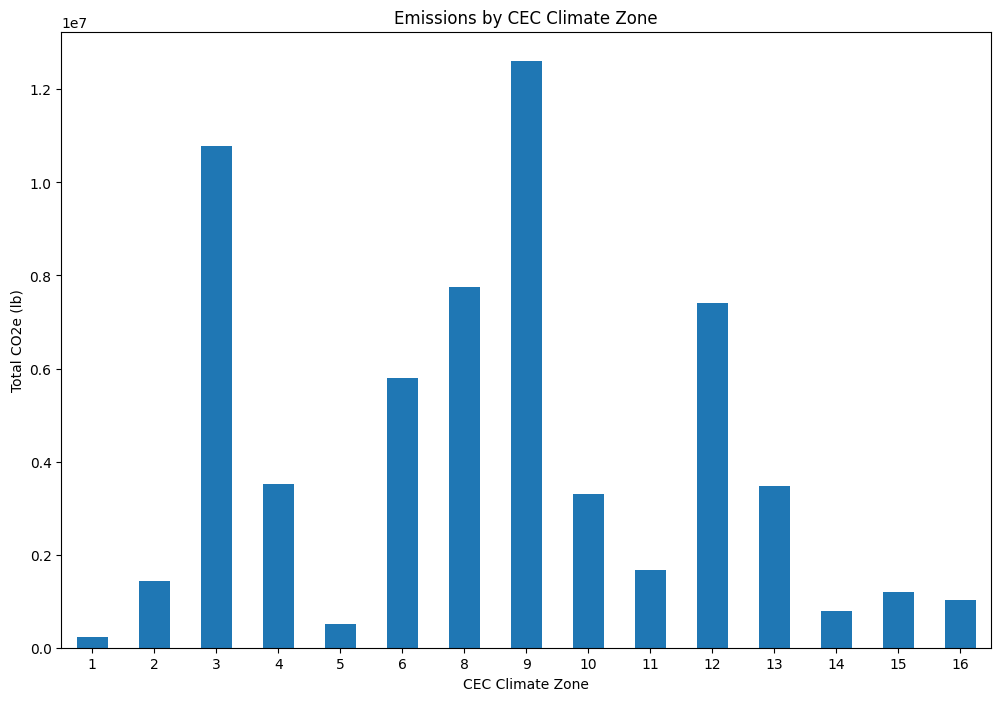

In [8]:
# Total CO2e emission by climate zone:

import matplotlib.pyplot as plt


grouped= df.groupby('build_existing_model.cec_climate_zone')['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].sum()

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)  # Adjust figsize as needed

# Generate bar graph for each group
ax = grouped.plot(kind='bar')
plt.ylabel('Total CO2e (lb)')
plt.xlabel('CEC Climate Zone')
plt.title('Emissions by CEC Climate Zone')

# Disable the legend
ax.legend().set_visible(False)

# Set custom x-tick positions and labels
xtick_positions = range(len(grouped.index))
xtick_labels = grouped.index

plt.xticks(xtick_positions, xtick_labels, rotation=0)

plt.show()


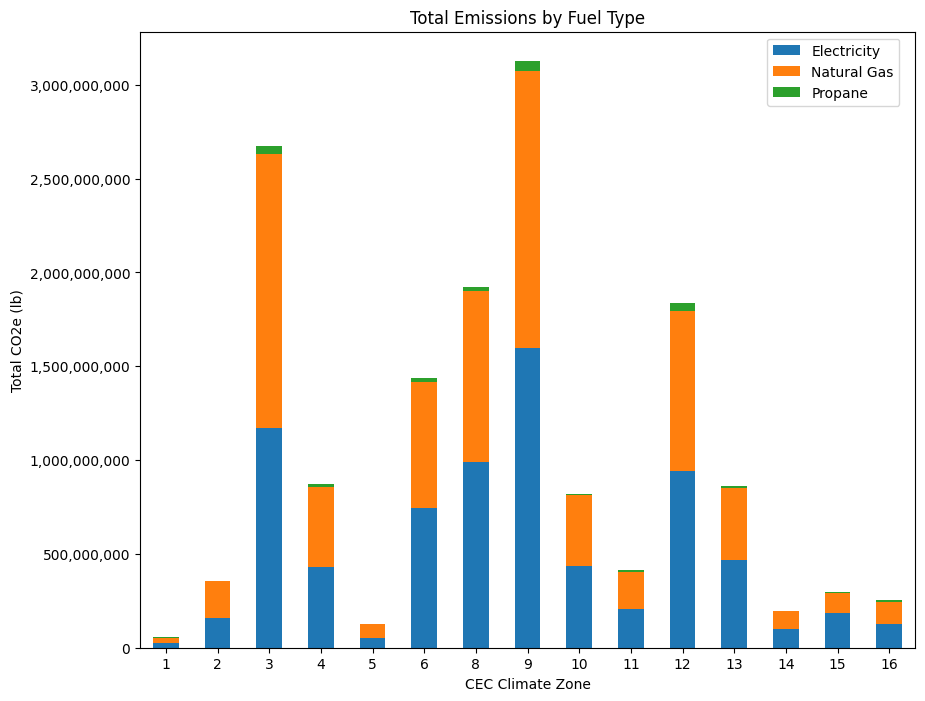

In [9]:
# Total Emissions by fuel type:

regex_patterns = [
    # 'report_simulation_output.emissions',
'build_existing_model.cec_climate_zone',
'build_existing_model.geometry_stories',
'build_existing_model.sample_weight',
'build_existing_model.occupants',
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb',

# Totals by fuel type:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb', # For Fuel Type Electricity Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb', # For Fuel Type Natural Gas Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb', # For Fuel Type Propane Total

# Heating, electricity:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_lb', # For Heating by fuel type electricity

# Water Heating, electricity:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_recirc_pump_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_solar_thermal_pump_lb', # For water heating by fuel type electricity

# Heating, natural gas:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_heat_pump_backup_lb', # For Heating by fuel type natural gas
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_lb', # For Heating by fuel type natural gas

# Water Heating, natural gas:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_hot_water_lb', # For water heating by fuel type natural gas

# Heating, propane:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_heat_pump_backup_lb', # For heating by fuel type Propane
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_lb', # For heating by fuel type Propane

# Water Heating, propane:
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_hot_water_lb' # For water heating by fuel type propane

]

# Filter out rows with the specified column value
#df_filtered = df[df['build_existing_model.heating_fuel'] != 'None']

df_total = df 
df_total['total'] = (df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb'] + \
    df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb'] + \
        df_total['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb'])



# Convert the column to numeric (integer)
grouped_by_electricity = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb'].sum()
grouped_by_natural_gas = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb'].sum()
grouped_by_propane = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb'].sum()

grouped_by_all = pd.DataFrame(
    {
        'Electricity': grouped_by_electricity*248,
        'Natural Gas': grouped_by_natural_gas*248,
        'Propane': grouped_by_propane*248
    }
)
grouped_by_all


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_all.plot(kind='bar', stacked=True)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Total CO2e (lb)')
plt.title('Total Emissions by Fuel Type')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.8, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()


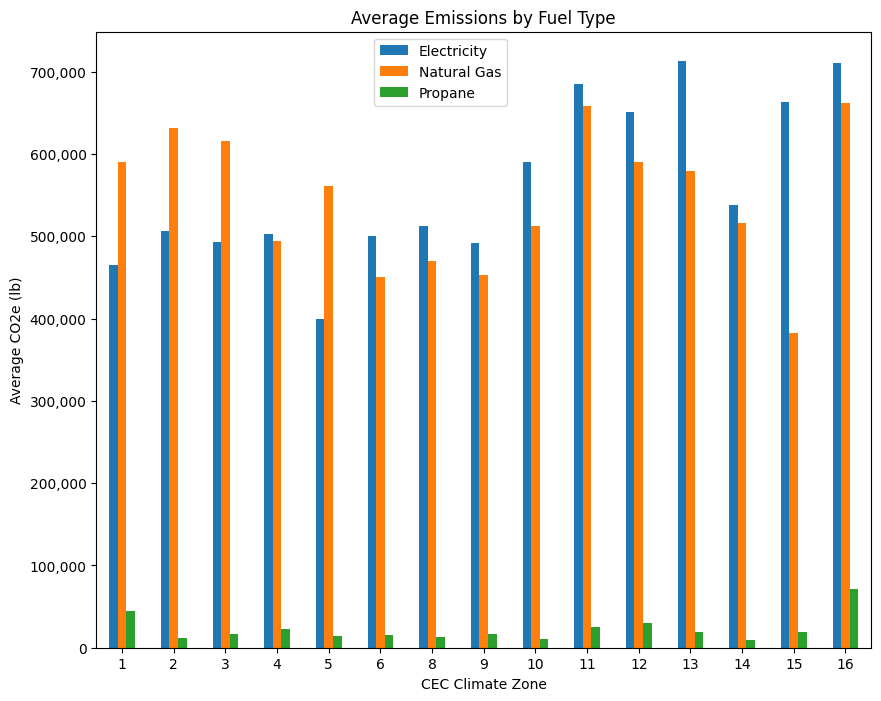

In [10]:
# Convert the column to numeric (integer)
grouped_by_electricity = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb'].mean()
grouped_by_natural_gas = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb'].mean()
grouped_by_propane = df_total.groupby(['build_existing_model.cec_climate_zone'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb'].mean()

grouped_by_all = pd.DataFrame(
    {
        'Electricity': grouped_by_electricity*248,
        'Natural Gas': grouped_by_natural_gas*248,
        'Propane': grouped_by_propane*248
    }
)
grouped_by_all


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_all.plot(kind='bar', stacked=False)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Average CO2e (lb)')
plt.title('Average Emissions by Fuel Type')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.35, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

In [12]:
# Stacked bar charts comparing water heater and HVAC emissions:

# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# # Set the inline backend and desired figure size
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed
# # Create a figure with the specified DPI
# plt.figure(dpi=500)

# # Filter out rows with the specified column value
# df_filtered = df[df['build_existing_model.heating_fuel'] != 'None']
# df_filtered = df_filtered[df_filtered['build_existing_model.water_heater_fuel'] != 'None']
# df_filtered = df_filtered[df_filtered['build_existing_model.heating_fuel'] != 'Other Fuel']
# df_filtered = df_filtered[df_filtered['build_existing_model.water_heater_fuel'] != 'Other Fuel']

# grouped_wh = df_filtered.groupby(['build_existing_model.water_heater_fuel'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].sum()
# grouped_hvac = df_filtered.groupby(['build_existing_model.heating_fuel'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].sum()

# desired_column_order = ['Electricity', 'Natural Gas', 'Propane']

# values_wh = grouped_wh[desired_column_order]
# values_hvac = grouped_hvac[desired_column_order]

# #####################################################

# plot_df = pd.DataFrame({'HVAC': values_hvac, 'Water': values_wh})


# plot_df = plot_df.transpose() # Toggle commenting for error checking
# # column_sums = plot_df.sum() # Toggle commenting for error checking
# # plot_df.loc['Total'] = column_sums # Toggle commenting for error checking
# print(plot_df)

# # Create a stacked bar chart
# ax = plot_df.plot.bar(stacked=True, figsize=(8, 6))

# # Add labels and title
# plt.xlabel('Heating Category')
# plt.ylabel('Total CO2e (lb)')
# plt.title('Total Emissions by HVAC and Water Heater Fuel Types')
# plt.legend(title='Fuel')

# plt.xticks(rotation=0)
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# # Move the legend to the right by adjusting bbox_to_anchor
# plt.legend(title='', bbox_to_anchor=(0.38, 1), loc='upper left')

# # Show the plot
# plt.show()

# # 59,541,628.08

In [14]:
# Multiple bar charts comparing water heater and HVAC emissions:

# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# # Set the inline backend and desired figure size
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed
# # Create a figure with the specified DPI
# plt.figure(dpi=500)

# # Filter out rows with the specified column value
# df_filtered = df[df['build_existing_model.heating_fuel'] != 'None']
# df_filtered = df_filtered[df_filtered['build_existing_model.water_heater_fuel'] != 'None']
# df_filtered = df_filtered[df_filtered['build_existing_model.heating_fuel'] != 'Other Fuel']
# df_filtered = df_filtered[df_filtered['build_existing_model.water_heater_fuel'] != 'Other Fuel']


# grouped_wh = df_filtered.groupby(['build_existing_model.water_heater_fuel'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].mean()
# grouped_hvac = df_filtered.groupby(['build_existing_model.heating_fuel'])['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb'].mean()

# desired_column_order = ['Electricity', 'Natural Gas', 'Propane']

# values_wh = grouped_wh[desired_column_order]*248
# values_hvac = grouped_hvac[desired_column_order]*248

# #####################################################

# plot_df = pd.DataFrame({'HVAC': values_hvac, 'Water': values_wh})
# plot_df = plot_df.transpose()

# # column_sums = plot_df.sum()
# # plot_df.loc['Total'] = column_sums
# print(plot_df)

# # Create a stacked bar chart
# ax = plot_df.plot.bar(stacked=False, figsize=(8, 6))

# # Add labels and title
# plt.xlabel('Heating Category')
# plt.ylabel('Average CO2e (lb)')
# plt.title('Average Emissions by HVAC and Water Heater Fuel Types')
# plt.legend(title='Fuel')

# plt.xticks(rotation=0)
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# # Show the plot
# plt.show()

In [13]:
# Total Emissions by fuel type:

regex_patterns = [
    # 'report_simulation_output.emissions',
'build_existing_model.cec_climate_zone',
'build_existing_model.geometry_stories',
'build_existing_model.sample_weight',
'build_existing_model.occupants',
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_total_lb',

# Totals by fuel type: *
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_total_lb', # For Fuel Type Electricity Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_total_lb', # For Fuel Type Natural Gas Total
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_total_lb', # For Fuel Type Propane Total

# Heating, electricity: *
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_fans_pumps_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_lb', # For Heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_lb', # For Heating by fuel type electricity

# Water Heating, electricity: *
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_recirc_pump_lb', # For water heating by fuel type electricity
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_solar_thermal_pump_lb', # For water heating by fuel type electricity

# Heating, natural gas: *
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_heat_pump_backup_lb', # For Heating by fuel type natural gas
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_lb', # For Heating by fuel type natural gas

# Water Heating, natural gas: *
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_hot_water_lb', # For water heating by fuel type natural gas

# Heating, propane: *
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_heat_pump_backup_lb', # For heating by fuel type Propane
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_lb', # For heating by fuel type Propane

# Water Heating, propane: *
'report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_hot_water_lb' # For water heating by fuel type propane

]

# Filter out rows with the specified column value
#df_filtered = df[df['build_existing_model.heating_fuel'] != 'None']

# df_hvac = df 
# df_hvac['electricity'] = df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_fans_pumps_lb'] + \
#     df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_fans_pumps_lb'] + \
#         df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_lb'] + \
#             df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_lb']

# df_hvac['natural_gas'] = df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_heat_pump_backup_lb'] + \
#     df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_lb']

# df_hvac['propane'] = df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_heat_pump_backup_lb'] + \
#     df_hvac['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_lb']





# df_wh = df
# df_wh['electricity'] = df_wh['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_lb'] + \
#     df_wh['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_recirc_pump_lb'] + \
#         df_wh['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_solar_thermal_pump_lb']

# df_wh['natural_gas'] = df_wh['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_hot_water_lb']

# df_wh['propane'] = df_wh['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_hot_water_lb']



df_combined = df 
df_combined['electricity_hvac'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_fans_pumps_lb'] + \
    df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_fans_pumps_lb'] + \
        df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_heat_pump_backup_lb'] + \
            df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_heating_lb']

df_combined['natural_gas_hvac'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_heat_pump_backup_lb'] + \
    df_check['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_heating_lb']

df_combined['propane_hvac'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_heat_pump_backup_lb'] + \
    df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_heating_lb']



df_combined['electricity_wh'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_lb'] + \
    df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_recirc_pump_lb'] + \
        df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_electricity_hot_water_solar_thermal_pump_lb']

df_combined['natural_gas_wh'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_natural_gas_hot_water_lb']

df_combined['propane_wh'] = df_combined['report_simulation_output.emissions_co_2_e_lrmer_mid_case_15_propane_hot_water_lb']



df_combined.to_csv('emissions/df_combined.csv', index=False)


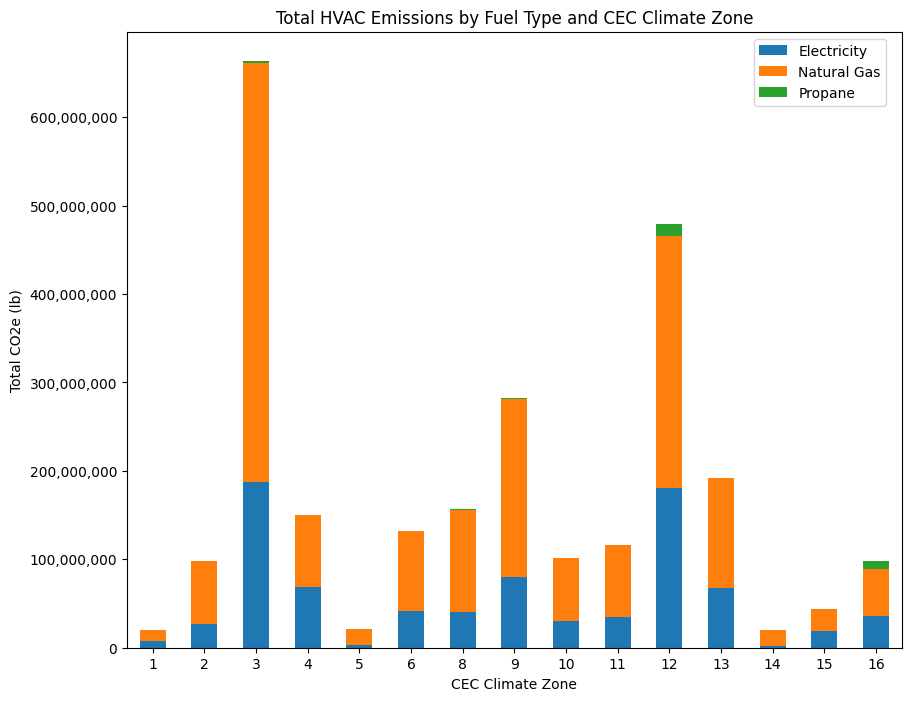

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_hvac.plot(kind='bar', stacked=True)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Total CO2e (lb)')
plt.title('Total HVAC Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.8, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

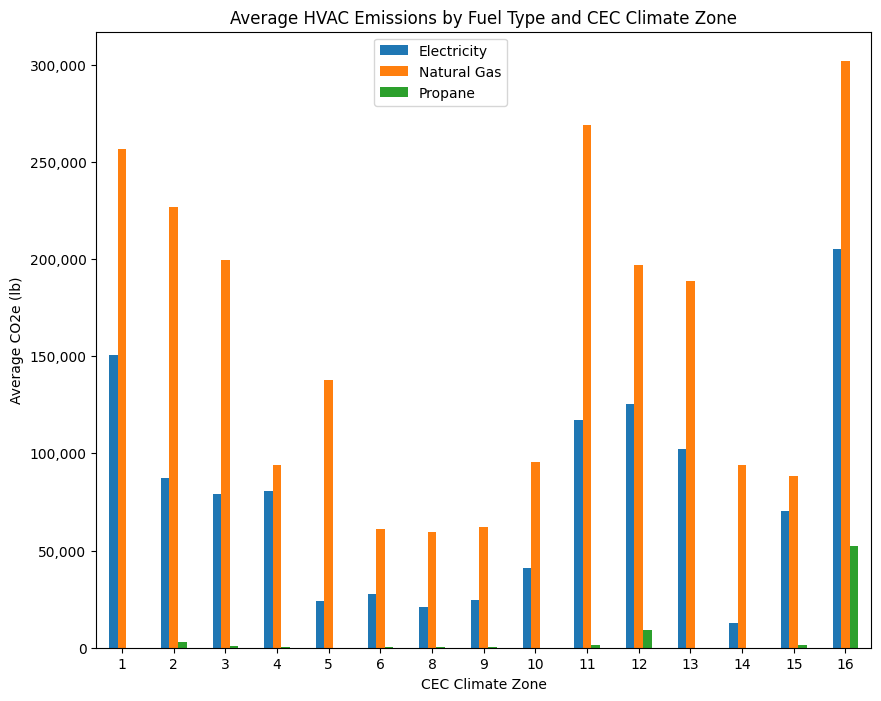

In [21]:

# Convert the column to numeric (integer)
hvac_grouped_by_electricity = df_combined.groupby(['build_existing_model.cec_climate_zone'])['electricity_hvac'].mean()
hvac_grouped_by_natural_gas = df_combined.groupby(['build_existing_model.cec_climate_zone'])['natural_gas_hvac'].mean()
hvac_grouped_by_propane = df_combined.groupby(['build_existing_model.cec_climate_zone'])['propane_hvac'].mean()



grouped_by_hvac = pd.DataFrame(
    {
        'Electricity': hvac_grouped_by_electricity*248,
        'Natural Gas': hvac_grouped_by_natural_gas*248,
        'Propane': hvac_grouped_by_propane*248
    }
)


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_hvac.plot(kind='bar', stacked=False)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Average CO2e (lb)')
plt.title('Average HVAC Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.35, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

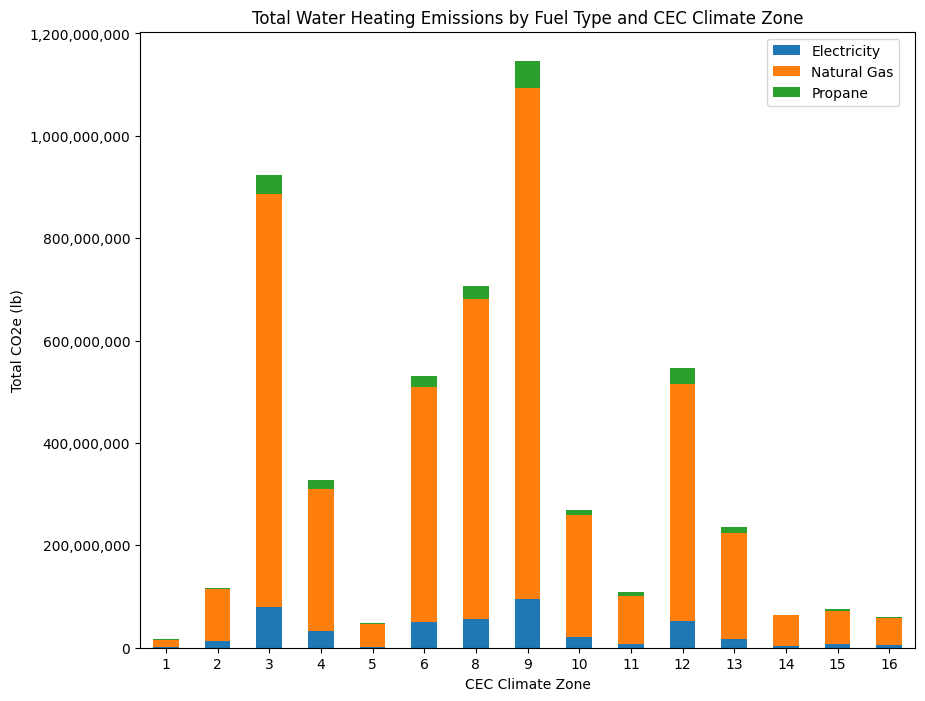

In [20]:

# Convert the column to numeric (integer)


wh_grouped_by_electricity = df_combined.groupby(['build_existing_model.cec_climate_zone'])['electricity_wh'].sum()
wh_grouped_by_natural_gas = df_combined.groupby(['build_existing_model.cec_climate_zone'])['natural_gas_wh'].sum()
wh_grouped_by_propane = df_combined.groupby(['build_existing_model.cec_climate_zone'])['propane_wh'].sum()

grouped_by_wh = pd.DataFrame(
    {
        'Electricity': wh_grouped_by_electricity*248,
        'Natural Gas': wh_grouped_by_natural_gas*248,
        'Propane': wh_grouped_by_propane*248
    }
)


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_wh.plot(kind='bar', stacked=True)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Total CO2e (lb)')
plt.title('Total Water Heating Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(0.8, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()


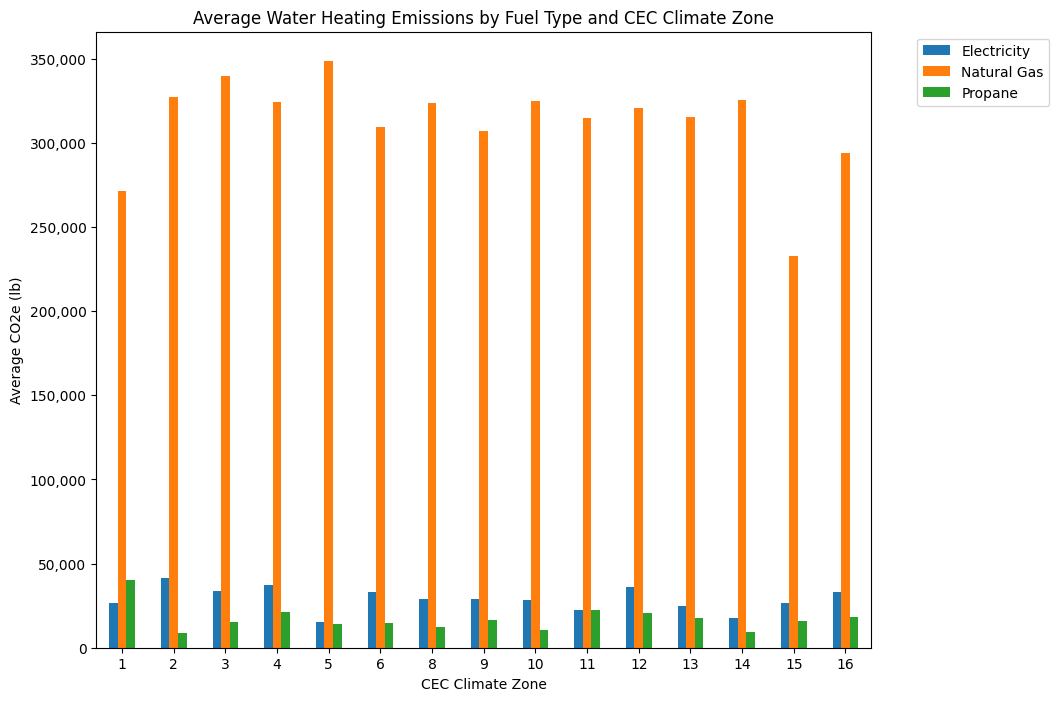

In [23]:

# Convert the column to numeric (integer)

wh_grouped_by_electricity = df_combined.groupby(['build_existing_model.cec_climate_zone'])['electricity_wh'].mean()
wh_grouped_by_natural_gas = df_combined.groupby(['build_existing_model.cec_climate_zone'])['natural_gas_wh'].mean()
wh_grouped_by_propane = df_combined.groupby(['build_existing_model.cec_climate_zone'])['propane_wh'].mean()


grouped_by_wh = pd.DataFrame(
    {
        'Electricity': wh_grouped_by_electricity*248,
        'Natural Gas': wh_grouped_by_natural_gas*248,
        'Propane': wh_grouped_by_propane*248
    }
)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the inline backend and desired figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)  # Adjust figsize as needed


ax = grouped_by_wh.plot(kind='bar', stacked=False)
plt.xlabel('CEC Climate Zone')
plt.ylabel('Average CO2e (lb)')
plt.title('Average Water Heating Emissions by Fuel Type and CEC Climate Zone')
plt.xticks(rotation=0)

# Move the legend to the right by adjusting bbox_to_anchor
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis tick labels with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

In [45]:
selected_columns = [
    'electricity_hvac',
    'natural_gas_hvac',
    'propane_hvac',
    'electricity_wh',
    'natural_gas_wh',
    'propane_wh'
]

df_subset = df_combined[selected_columns]

electricity_hvac_sum = df_subset['electricity_hvac'].sum()
natural_gas_hvac_sum = df_subset['natural_gas_hvac'].sum()
propane_hvac_sum = df_subset['propane_hvac'].sum()

electricity_wh_sum = df_subset['electricity_wh'].sum()
natural_gas_wh_sum = df_subset['natural_gas_wh'].sum()
propane_wh_sum = df_subset['propane_wh'].sum()

data = {
    'Heating Category': [ 'Electricity', 'Natural Gas', 'Propane' ],
    'HVAC': [electricity_hvac_sum, natural_gas_hvac_sum, propane_hvac_sum],
    'Water Heating': [electricity_wh_sum, natural_gas_wh_sum, propane_wh_sum]
}

df_plot = pd.DataFrame(data)


# Set 'Heating Category' column as the index
df_plot.set_index('Heating Category', inplace=True)

df_plot = df_plot.transpose()

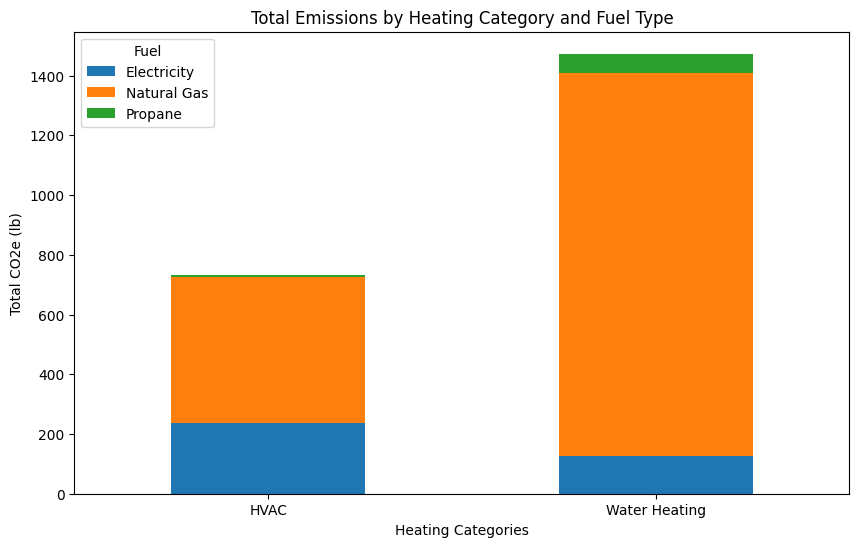

In [57]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6), dpi = 100)

# Stacked bar chart for HVAC and Water Heating
df_plot[['Electricity', 'Natural Gas', 'Propane']].plot(kind='bar', stacked=True, ax=ax)

# Customize labels and titles
ax.set_ylabel('Total CO2e (lb)')
ax.set_xlabel('Heating Categories')
ax.set_title('Total Emissions by Heating Category and Fuel Type')
ax.legend(title='Fuel')

# Rotate x-axis tick labels to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()

In [58]:
# Average emissions by heating category and fuel type: 

electricity_hvac_sum = df_subset['electricity_hvac'].mean()
natural_gas_hvac_sum = df_subset['natural_gas_hvac'].mean()
propane_hvac_sum = df_subset['propane_hvac'].mean()

electricity_wh_sum = df_subset['electricity_wh'].mean()
natural_gas_wh_sum = df_subset['natural_gas_wh'].mean()
propane_wh_sum = df_subset['propane_wh'].mean()

data = {
    'Heating Category': [ 'Electricity', 'Natural Gas', 'Propane' ],
    'HVAC': [electricity_hvac_sum, natural_gas_hvac_sum, propane_hvac_sum],
    'Water Heating': [electricity_wh_sum, natural_gas_wh_sum, propane_wh_sum]
}

df_plot = pd.DataFrame(data)


# Set 'Heating Category' column as the index
df_plot.set_index('Heating Category', inplace=True)

df_plot = df_plot.transpose()

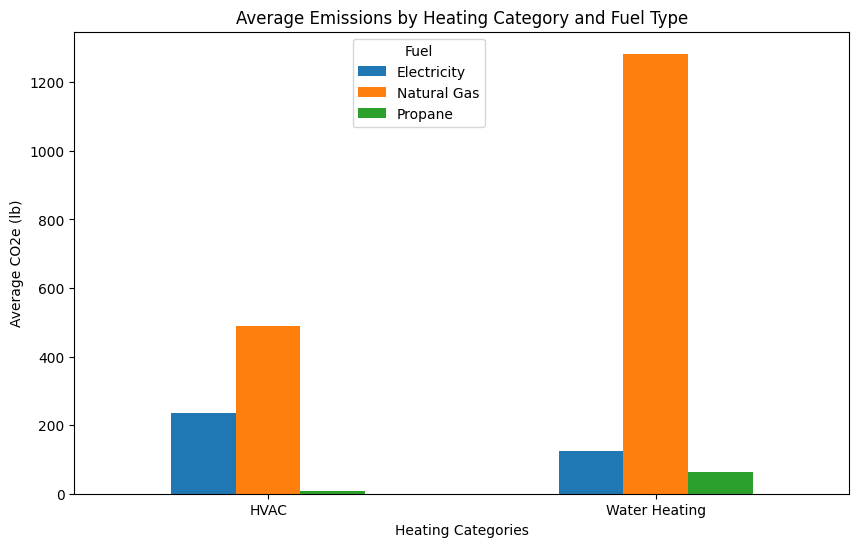

In [61]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for HVAC and Water Heating
df_plot[['Electricity', 'Natural Gas', 'Propane']].plot(kind='bar', stacked=False, ax=ax)

# Customize labels and titles
ax.set_ylabel('Average CO2e (lb)')
ax.set_xlabel('Heating Categories')
ax.set_title('Average Emissions by Heating Category and Fuel Type')
ax.legend(title='Fuel', bbox_to_anchor=(0.35, 1), loc='upper left')


# Rotate x-axis tick labels to 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)



# Show the plot
plt.show()